In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

### Two good articles

https://medium.com/@samchaaa/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d
    
https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

### Rule #1: Don’t standardize dummy variables.

### Rule #2: Always standardize AFTER generating PolynomialFeatures.

As an example, let's first read in a stupid made up data set containing two numerical explanatory variables (GPA and age), two categorical (athletic and gender), and a response variable, happiness.


In [53]:
df = pd.read_csv('data/students2.csv')
df.head()

,age,gender,athletic,gpa,happiness
0,20,F,Yes,2.1,11.180340
1,25,M,No,3.9,-6.180340
2,25,M,No,3.0,1.000000
3,18,M,Yes,2.7,6.669775
4,16,F,Yes,2.3,13.302487


First, create a one-hot matrix for the categorical data:

In [54]:
one_hot_gender = pd.get_dummies(df['gender'])
one_hot_athletic = pd.get_dummies(df['athletic'])
one_hot = one_hot_gender.join(one_hot_athletic)
one_hot.head()

,F,M,No,Yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,0,1
4,1,0,0,1


Put these categorical variables aside for now and drop them from the dataframe, so that we have only the numerical explanatory variables left:

In [55]:
y = df['happiness']
df = df.drop(columns = ['gender', 'athletic', 'happiness'])
df.head()

,age,gpa
0,20,2.1
1,25,3.9
2,25,3.0
3,18,2.7
4,16,2.3


We should apply polynomial features BEFORE we scale, so let's explore the best polynomial to use:

[12.518761892323983, 7.815840369582714, 3.195566202879364, 3.203339110888255, 3.470486125621505, 3.166583041931805, 3.0434177178829245, 4.242696779811852, 4.121928900171849, 3.1188400874363786, 3.4740209701244136, 3.3617607859336096, 4.2189079533802465, 6.221672305894211, 4.7331028521777165, 6.20995020536376, 7.170580427648619] [9.553201143246474, 5.511964061308067, 3.3819023277872087, 3.9664013039645, 3.618994568401632, 3.751096313982727, 3.649623842172279, 4.843253161296319, 5.11789878290303, 3.820568225731637, 4.07486118954603, 3.930360992854251, 5.537179132055803, 8.809240352249498, 5.691325516652167, 7.2769048321950836, 8.333232143720316]


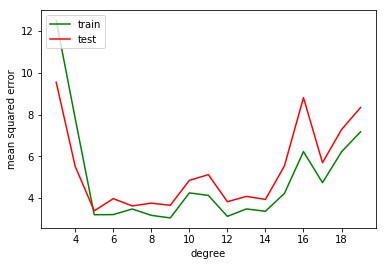

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state = 99)

mindegree = 3
maxdegree = 20
train_error = []
test_error = []
for deg in range(mindegree,maxdegree):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression())
    model.fit(X_train,y_train)
    train_error.append(mean_squared_error(y_train,model.predict(X_train)))
    test_error.append(mean_squared_error(y_test,model.predict(X_test)))
print(train_error,test_error)
plt.plot(np.arange(mindegree,maxdegree), train_error, color='green', label='train')
plt.plot(np.arange(mindegree,maxdegree), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')

You decide to use degree 5, so apply polynomial features to the NUMERICAL explanatory variables. 

In [57]:
poly = PolynomialFeatures(5)
poly.fit(df)
df_poly = poly.transform(df)
df_poly

array([[1.0000000e+00, 2.0000000e+01, 2.1000000e+00, ..., 3.7044000e+03,
        3.8896200e+02, 4.0841010e+01],
       [1.0000000e+00, 2.5000000e+01, 3.9000000e+00, ..., 3.7074375e+04,
        5.7836025e+03, 9.0224199e+02],
       [1.0000000e+00, 2.5000000e+01, 3.0000000e+00, ..., 1.6875000e+04,
        2.0250000e+03, 2.4300000e+02],
       ...,
       [1.0000000e+00, 1.8000000e+01, 3.6000000e+00, ..., 1.5116544e+04,
        3.0233088e+03, 6.0466176e+02],
       [1.0000000e+00, 2.4000000e+01, 2.9000000e+00, ..., 1.4048064e+04,
        1.6974744e+03, 2.0511149e+02],
       [1.0000000e+00, 1.9000000e+01, 2.7000000e+00, ..., 7.1055630e+03,
        1.0097379e+03, 1.4348907e+02]])

Now, we will scale this transformed data. For now, we'll scale the entire dataset, but really you should only scale the training set so that information from the testing set doesn't leak in:

In [58]:
scaler = StandardScaler()
scaler.fit(df_poly)
X_scaled = scaler.transform(df_poly)
X_scaled

array([[ 0.        ,  0.20027184, -1.52721063, ..., -0.96720752,
        -1.07167231, -1.02768376],
       [ 0.        ,  1.49813743,  1.56299119, ...,  3.26995996,
         2.82039691,  2.00023843],
       [ 0.        ,  1.49813743,  0.01789028, ...,  0.70513529,
         0.1086794 , -0.31707197],
       ...,
       [ 0.        , -0.31887439,  1.04795756, ...,  0.48185456,
         0.82892887,  0.95421015],
       [ 0.        ,  1.23856431, -0.1537876 , ...,  0.34618383,
        -0.12762036, -0.45025438],
       [ 0.        , -0.05930127, -0.49714336, ..., -0.53534333,
        -0.62380135, -0.66686418]])

Finally, we can merge the transformed numerical data with the categorical data:

In [59]:
X = one_hot.join(pd.DataFrame(X_scaled))
X.head()

,F,M,No,Yes,0,1,2,3,4,5,...,11,12,13,14,15,16,17,18,19,20
0,1,0,0,1,0.0,0.200272,-1.527211,0.104359,-0.969648,-1.387985,...,-0.490866,-0.909295,-1.153518,-1.134755,-0.165255,-0.452977,-0.741265,-0.967208,-1.071672,-1.027684
1,0,1,1,0,0.0,1.498137,1.562991,1.626621,2.531790,1.692069,...,2.644010,3.049076,2.751191,1.912490,1.973792,2.721135,3.210679,3.269960,2.820397,2.000238
2,0,1,1,0,0.0,1.498137,0.017890,1.626621,1.112288,-0.078962,...,1.645217,1.064714,0.320141,-0.249586,1.973792,1.781382,1.315881,0.705135,0.108679,-0.317072
3,0,1,0,1,0.0,-0.318874,-0.497143,-0.409828,-0.553261,-0.566637,...,-0.565698,-0.603577,-0.644805,-0.650178,-0.592187,-0.593486,-0.599977,-0.627816,-0.662143,-0.666864
4,1,0,0,1,0.0,-0.838021,-1.183855,-0.869889,-1.297711,-1.137017,...,-1.014975,-1.118793,-1.125078,-1.012000,-0.866178,-0.948210,-1.007079,-1.042078,-1.029262,-0.945000


And apply a regression:

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9881909048273082


What is the happiness of the first student predicted to be using this model?

In [61]:
model.predict([X.iloc[0]])

array([11.56067293])

What if you actually wanted to input this student? (Age 20, gpa 2.1, female, athletic).
First transform the numerical data:

In [62]:
numerical = scaler.transform(poly.transform([[20,2.1]]))
numerical

array([[ 0.        ,  0.20027184, -1.52721063,  0.10435851, -0.96964845,
        -1.38798465,  0.00863644, -0.61468425, -1.18317922, -1.25564073,
        -0.08232658, -0.49086585, -0.90929502, -1.15351775, -1.13475499,
        -0.16525486, -0.45297666, -0.74126512, -0.96720752, -1.07167231,
        -1.02768376]])

Then join it with the categorical data (Female yes, Male no, non-athletic No, athletic Yes):

In [63]:
inputdata = np.concatenate(([1,0,0,1], numerical[0]), axis=0)
inputdata

array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.20027184, -1.52721063,  0.10435851, -0.96964845, -1.38798465,
        0.00863644, -0.61468425, -1.18317922, -1.25564073, -0.08232658,
       -0.49086585, -0.90929502, -1.15351775, -1.13475499, -0.16525486,
       -0.45297666, -0.74126512, -0.96720752, -1.07167231, -1.02768376])

Now predict her happiness:

In [64]:
model.predict([inputdata])

array([11.56067293])

If you wanted to use a pipeline, this would be the entire process:

In [65]:
df = pd.read_csv('data/students2.csv')
one_hot_gender = pd.get_dummies(df['gender'])
one_hot_athletic = pd.get_dummies(df['athletic'])
one_hot = one_hot_gender.join(one_hot_athletic)

y = df['happiness']
numerical = df.drop(columns = ['gender', 'athletic', 'happiness'])

model = make_pipeline(PolynomialFeatures(5), StandardScaler())
model.fit(numerical)
X = one_hot.join(pd.DataFrame(model.transform(numerical)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 99)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9881909048273082


In [66]:
X

,F,M,No,Yes,0,1,2,3,4,5,...,11,12,13,14,15,16,17,18,19,20
0,1,0,0,1,0.0,0.200272,-1.527211,0.104359,-0.969648,-1.387985,...,-0.490866,-0.909295,-1.153518,-1.134755,-0.165255,-0.452977,-0.741265,-0.967208,-1.071672,-1.027684
1,0,1,1,0,0.0,1.498137,1.562991,1.626621,2.531790,1.692069,...,2.644010,3.049076,2.751191,1.912490,1.973792,2.721135,3.210679,3.269960,2.820397,2.000238
2,0,1,1,0,0.0,1.498137,0.017890,1.626621,1.112288,-0.078962,...,1.645217,1.064714,0.320141,-0.249586,1.973792,1.781382,1.315881,0.705135,0.108679,-0.317072
3,0,1,0,1,0.0,-0.318874,-0.497143,-0.409828,-0.553261,-0.566637,...,-0.565698,-0.603577,-0.644805,-0.650178,-0.592187,-0.593486,-0.599977,-0.627816,-0.662143,-0.666864
4,1,0,0,1,0.0,-0.838021,-1.183855,-0.869889,-1.297711,-1.137017,...,-1.014975,-1.118793,-1.125078,-1.012000,-0.866178,-0.948210,-1.007079,-1.042078,-1.029262,-0.945000
5,1,0,1,0,0.0,0.459845,1.047958,0.381749,1.150141,1.050391,...,0.683863,1.110912,1.237157,1.000996,0.122781,0.520375,0.913563,1.174982,1.192466,0.954210
6,1,0,1,0,0.0,-0.838021,0.532924,-0.869889,-0.288288,0.460048,...,-0.724056,-0.385837,0.019235,0.291020,-0.866178,-0.773027,-0.559161,-0.269418,0.016673,0.204409
7,1,0,1,0,0.0,-1.097594,1.562991,-1.079623,0.071320,1.692069,...,-0.749220,-0.061483,0.966390,1.912490,-0.960398,-0.823365,-0.427772,0.257137,1.151320,2.000238
8,0,1,1,0,0.0,-0.059301,-1.355533,-0.159500,-0.982266,-1.265353,...,-0.612333,-0.917864,-1.102091,-1.077555,-0.401098,-0.584743,-0.781930,-0.949491,-1.031180,-0.990089
9,1,0,1,0,0.0,-0.838021,1.734669,-0.869889,0.418309,1.917370,...,-0.520412,0.282984,1.370219,2.267063,-0.866178,-0.650399,-0.150435,0.642790,1.602843,2.428232


Or using RidgeCV:

In [69]:
df = pd.read_csv('data/students2.csv')
one_hot_gender = pd.get_dummies(df['gender'])
one_hot_athletic = pd.get_dummies(df['athletic'])
one_hot = one_hot_gender.join(one_hot_athletic)

y = df['happiness']
numerical = df.drop(columns = ['gender', 'athletic', 'happiness'])

model = make_pipeline(PolynomialFeatures(2), StandardScaler())
model.fit(numerical)
X = one_hot.join(pd.DataFrame(model.transform(numerical)))

model = RidgeCV(cv=10, alphas=[0.0001, 0.1, 1])
model.fit(X, y)
print(model.score(X, y))

0.4737781444772784


One last thing...it's kind of annoying that when you scale the numerical columns, you lose the column names. You can maintain them with this workflow:

In [12]:
#original dataframe
df = pd.read_csv('data/students2.csv')

#separate out categorical variables
one_hot_gender = pd.get_dummies(df['gender'])
one_hot_athletic = pd.get_dummies(df['athletic'])
one_hot = one_hot_gender.join(one_hot_athletic)

#separate out target variable
y = df['happiness']

#separate out numerical variables
numerical = df.drop(columns = ['gender', 'athletic', 'happiness'])

#scale numerical variables
scaler = StandardScaler()
scaler.fit(numerical)
scaled_numerical = scaler.transform(numerical)
scaled_numerical = pd.DataFrame(scaled_numerical)

#rename numerical columns
scaled_numerical.columns = numerical.columns

#join all of the explanatory variables back up
X = scaled_numerical.join(one_hot)
X.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


,age,gpa,F,M,No,Yes
0,0.200272,-1.527211,1,0,0,1
1,1.498137,1.562991,0,1,1,0
2,1.498137,0.017890,0,1,1,0
3,-0.318874,-0.497143,0,1,0,1
4,-0.838021,-1.183855,1,0,0,1
